In [112]:
# import libraries.
%matplotlib notebook
import pandas as pd

In [113]:
# Load edgefiles.
edge_one = pd.read_csv('out_one_edges.txt', sep='\t')
edge_two = pd.read_csv('out_two_edges.txt', sep='\t')
edge_three = pd.read_csv('out_three_edges.txt', sep='\t')
edge_three_greedy = pd.read_csv('out_three_greedy_edges.txt', sep='\t')

In [114]:
# Load log files.
log_one = pd.read_csv('out_one_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=["Edge", "Pagerank_one"])
log_two = pd.read_csv('out_two_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=["Edge", "Pagerank_two"])
log_three = pd.read_csv('out_three_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=["Edge", "Pagerank_three"])
log_three_greedy = pd.read_csv('out_three_greedy_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=["Edge", "Pagerank_three_greedy"])

  ## Plot Red Ratio Pagerank.

In [115]:
# Merge logs on edge.
logs = pd.merge(log_one, log_two, on='Edge')
logs = logs.merge(log_three, on='Edge')
logs = logs.merge(log_three_greedy, on ='Edge')

<IPython.core.display.Javascript object>


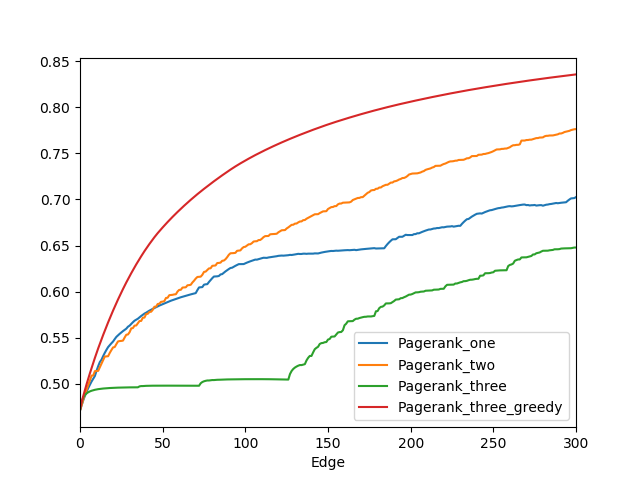

In [116]:
logs.plot(x= 0, y = [1, 2, 3, 4], kind='line')

## Compare Product to Formula.

- Same target nodes. Different Source nodes.
- Source out degree indeed has a significant role in formula.
- Source red absorbing probability also seems to has to a role in formula.'


In [117]:
# Product.
print("-------------PRODUCT-------------")
print("Unique Sources: ", edge_one['Source'].nunique(), "Set: ", edge_one['Source'].unique())
print("Unique Targets: ", edge_one['Target'].nunique(), "Set: ", edge_one['Target'].unique())
print("Average targets per source", edge_one.groupby('Source').count().mean()['Target'])
print("Average sources per target", edge_one.groupby('Target').count().mean()['Source'])

-------------PRODUCT-------------
Unique Sources:  11 Set:  [37 34 50 32 83 82 77 49 33 22 60]
Unique Targets:  43 Set:  [70 74 72 73 71  7  0  1  8  6  2  3  5 91  9  4 32 46 13 38 83 43 89 12
 84 88 11 10 77 35 41 87 85 82 80 81 22 78 21 90 76 79 75]
Average targets per source 27.272727272727273
Average sources per target 6.976744186046512


In [118]:
# Formula.
print("-------------Formula-------------")
print("Unique Targets: ", edge_three['Source'].nunique(), "Set: ", edge_three['Source'].unique())
print("Unique Targets: ", edge_three['Target'].nunique(), "Set: ", edge_three['Target'].unique())
print("Average targets per source", edge_three.groupby('Source').count().mean()['Target'])
print("Average sources per target", edge_three.groupby('Target').count().mean()['Source'])

-------------Formula-------------
Unique Targets:  11 Set:  [31 45 40 54 53 34 23 67 66 57 18]
Unique Targets:  43 Set:  [70 74 72 73 71  7  0  1  8  6  2  3  5 91  9  4 32 46 13 38 83 43 89 12
 84 88 11 10 77 35 41 87 85 82 80 81 22 78 21 90 76 79 75]
Average targets per source 27.272727272727273
Average sources per target 6.976744186046512


In [119]:
# Source's score is pagerank.
# Source's score 2 is red absorbing probability.
# Target's score is red absorbing probability.
edge_one.sort_values('Edge_Score', ascending=False)

,Source,Target,Source_score_1,Source_score_2,Target_score,Edge_Score,Source_out_d
0,37,70,0.028284,0.030159,0.973552,0.027536,24
1,37,74,0.028284,0.030159,0.973014,0.027521,24
2,37,72,0.028284,0.030159,0.971951,0.027491,24
3,37,73,0.028284,0.030159,0.970356,0.027446,24
4,37,71,0.028284,0.030159,0.970019,0.027436,24
...,...,...,...,...,...,...,...
295,60,74,0.020224,0.025806,0.973014,0.019678,17
296,60,72,0.020224,0.025806,0.971951,0.019656,17
297,22,6,0.020450,0.899797,0.960795,0.019648,17
298,22,2,0.020450,0.899797,0.959730,0.019626,17


In [120]:
# Source's score 1 is pagerank / out degree.
# Source's score 2 is red absorbing probability.
# Target's score is red absorbing probability.
edge_three.sort_values('Edge_Score', ascending=False)

,Source,Target,Source_score_1,Source_score_2,Target_score,Edge_Score,Source_out_d
0,31,70,0.002780,0.023196,0.973552,0.480993,3
1,31,74,0.002780,0.023196,0.973014,0.480987,3
2,31,72,0.002780,0.023196,0.971951,0.480976,3
3,31,73,0.002780,0.023196,0.970356,0.480960,3
4,31,71,0.002780,0.023196,0.970019,0.480957,3
...,...,...,...,...,...,...,...
295,23,88,0.001897,0.030424,0.940065,0.477686,2
296,66,91,0.001595,0.046107,0.957012,0.477686,4
297,34,77,0.001333,0.036700,0.933894,0.477683,21
298,57,6,0.001481,0.028754,0.960795,0.477677,5


In [122]:
# Source's score 1 is pagerank / out degree.
# Source's score 2 is red absorbing probability.
# Target's score is red absorbing probability.
edge_three_greedy.sort_values('Edge_Score')

,Source,Target,Source_score_1,Source_score_2,Target_score,Edge_Score,Source_out_d
0,31,70,0.002780,0.023196,0.973552,0.480993,3
1,23,70,0.001883,0.034491,0.973636,0.487299,2
2,54,70,0.001680,0.041281,0.973746,0.493651,3
3,67,70,0.001619,0.084694,0.973854,0.499872,4
4,18,70,0.001427,0.033313,0.974134,0.505945,5
...,...,...,...,...,...,...,...
295,48,1,0.000210,0.674879,0.989229,0.834714,21
296,21,73,0.000958,0.953925,0.990085,0.834934,12
297,33,8,0.000196,0.665189,0.989125,0.835154,26
298,45,72,0.000651,0.773925,0.990773,0.835374,3
